In [1]:
import json
import gzip
import base64
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import os
%matplotlib inline

In [17]:
ENTROPY = '/home/llandsmeer/Projects/MEP/cscs/analysis/entropy'
fns = os.listdir(ENTROPY)

raw = []
for fn in fns:
    sim = fn.split('.')[0]
    f = np.load(os.path.join(ENTROPY, fn))
    data = json.loads(base64.urlsafe_b64decode(sim))
    for k in f.keys():
        data[k] = np.array(f[k])
    if len(data['spikes']) != 2 or '5000' not in data['spikes']:
        continue
    delta = int(list(set(data['spikes']) - {'5000'})[0]) - 5000
    data['delta'] = delta
    raw.append(data)
    
raw = sorted(raw, key=lambda row: row['delta'])
df = pd.DataFrame(raw)
df

,selected,tfinal,dt,gpu_id,spikes,key,S,t,delta
0,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5010': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.06720984397235333, -0.0658044555717245, -0...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",10
1,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5020': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.0629453963719859, -0.05813546006594529, -0...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",20
2,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5030': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.06121976097595462, -0.04359577537966874, -...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",30
3,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5040': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.06027755367264338, -0.04602935864045819, -...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",40
4,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5050': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.028066510273324317, -0.014315864242166285,...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",50
...,...,...,...,...,...,...,...,...,...
95,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5960': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.03174078576784796, -0.04007437170940082, -...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",960
96,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5970': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.05318904923005441, -0.03671542663903924, -...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",970
97,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5980': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.07247591564179928, -0.04513079369771819, -...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",980
98,2021-12-08-shadow_averages_0.001_0.5_3447248c-...,10000,0.025,0,"{'5000': 0.01, '5990': 0.01}",eyJzZWxlY3RlZCI6ICIyMDIxLTEyLTA4LXNoYWRvd19hdm...,"[-0.03662200093923384, -0.03356841515220025, -...","[0.0, 0.9750000000000005, 1.999999999999997, 2...",990


(4750.0, 6750.0)

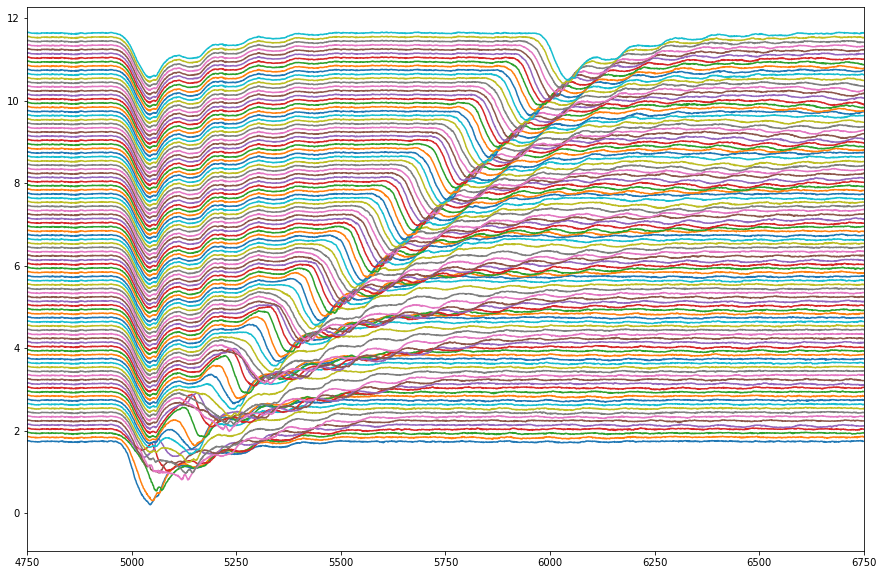

In [41]:
plt.figure(figsize=(15, 10))
for i, data in enumerate(raw):
    plt.plot(data['t'], data['S'] + i/10)
plt.xlim([4750, 6750])

(4000.0, 6000.0)

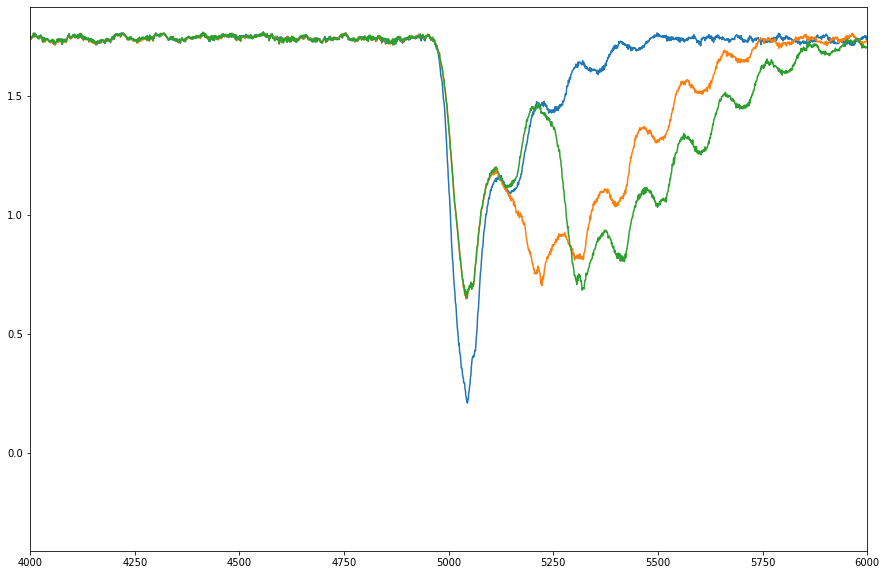

In [50]:
plt.figure(figsize=(15, 10))
plt.plot(raw[0]['S'])
plt.plot(raw[15]['S'])
plt.plot(raw[25]['S'])
plt.xlim([4000, 6000])

Text(0, 0.5, 'largest entropy drop')

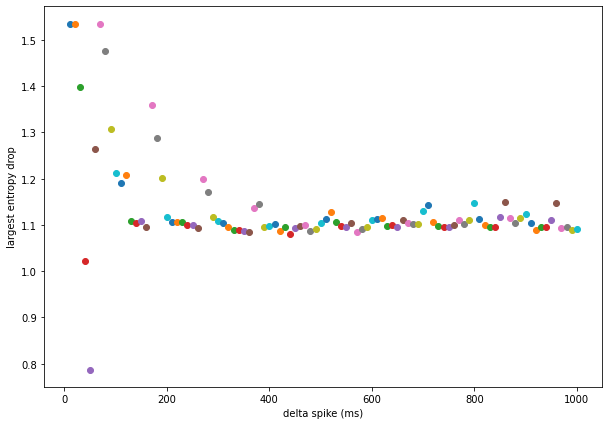

In [48]:
plt.figure(figsize=(10, 7))
for data in raw:
    plt.plot(data['delta'], data['S'][4000:4700].mean() - data['S'][4000:6000].min() , 'o')
plt.xlabel('delta spike (ms)')
plt.ylabel('largest entropy drop')